## 4.1 데이터 확인

In [12]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family = 'D2Coding')
    plt.rc('font', size = 8)
# plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
# plt.rcParams['font.size'] = 12



# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns",None)

# 그래프 글꼴 크기 설정
# plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

### 4.1.1 수치적・통계적으로 분석하는 방법

#### 타이타닉 데이터 집합

#### 타이타닉 데이터 집합의 각 필드와 의미

**생존** (survival): (0=사망, 1=생존)  
**선실등급** (pclass): (1=1등실, 2=2등실, 3=3등실)  
**성별**(sex): (male=남성, female=여성)  
**연령**(age)  
**형제 및 배우자 수**(sibsp): 동승한 형제 혹은 배우자의 수  
**부모 및 자녀 수**(parch): 동승한 부모 혹은 자녀의 수  
**요금**(fare)  
**승선항 코드**(embarked): (C=Cherbourg, Q=Queenstown, S=Southampton)  
**선실등급명**(class): (First=1등실, Second=2등실, Third=3등실)  
**남녀어린이 구분**(who): (man=성인 남성, woman=성인 여성, child=어린이)  
**성인 남성 여부**(adult_male): True/False  
**데크번호**(deck): 선실번호의 머리글자 (A부터 G까지)  
**승선항**(embark_town): Southampton/Cherbourg/Queenstown  
**생존 여부**(alive): yes / no  
**독신 여부**(alone): True/ False  

In [3]:
# 추가 라이브러리 임포트
import seaborn as sns

# 데이터 읽어 들이기
df_titanic = sns.load_dataset("titanic")

# display(df_titanic)

# 우리말 필드명 정의
columns_t = [ '생존', '선실등급', '성별', '연령', '형제_및_배우자_수',
              '부모_및_자녀_수', '요금', '승선항_코드', '선실등급명',
              '남녀어린이_구분', '성인_남성_여부', '데크번호', '승선항', '생존_여부', '독신_여부']
df_titanic.columns = columns_t

# 데이터 내용 확인 
display(df_titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 필드 별로 누락 값 조사하기

In [4]:
print(df_titanic.isnull().sum())

생존              0
선실등급            0
성별              0
연령            177
형제_및_배우자_수      0
부모_및_자녀_수       0
요금              0
승선항_코드          2
선실등급명           0
남녀어린이_구분        0
성인_남성_여부        0
데크번호          688
승선항             2
생존_여부           0
독신_여부           0
dtype: int64


#### 필드 값의 개수를 집계

In [5]:
# '승선항' 필드의 필드 값 개수를 집계
print(df_titanic['승선항'].value_counts())
print()

# '생존_여부' 필드의 필드 값 개수를 집계
print(df_titanic['생존_여부'].value_counts())

Southampton    644
Cherbourg      168
Queenstown      77
Name: 승선항, dtype: int64

no     549
yes    342
Name: 생존_여부, dtype: int64


#### 통계 정보 조사하기
##### describe() 표시 정보
- 숫자
  - count: 데이터의 건수
  - mean: 평균
  - std: 표준편차
  - min: 최소값
  - 25%: 25퍼센타일 값
  - 50%: 50퍼센타일 값
  - 75%: 75퍼센타일 값
- 숫자 외 데이터타입
  - unique: 유일 값 수
  - top: 최빈 값
  - freq: 최빈 값 수

In [9]:
display(df_titanic.describe(include='all'))

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
count,891.0000,891.0000,891,714.0000,891.0000,891.0000,891.0000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.3838,2.3086,NaN,29.6991,0.5230,0.3816,32.2042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.4866,0.8361,NaN,14.5265,1.1027,0.8061,49.6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,1.0000,NaN,0.4200,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0000,2.0000,NaN,20.1250,0.0000,0.0000,7.9104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0000,3.0000,NaN,28.0000,0.0000,0.0000,14.4542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.0000,3.0000,NaN,38.0000,1.0000,0.0000,31.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 애그리게이션 함수 사용하기

In [10]:
display(df_titanic.groupby('성별').mean())

,생존,선실등급,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부
성별,,,,,,,,
female,0.7420,2.1592,27.9157,0.6943,0.6497,44.4798,0.0000,0.4013
male,0.1889,2.3899,30.7266,0.4298,0.2357,25.5239,0.9307,0.7123


#### 그래프 그리기 (숫자 필드)

findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Apple Gothic' not

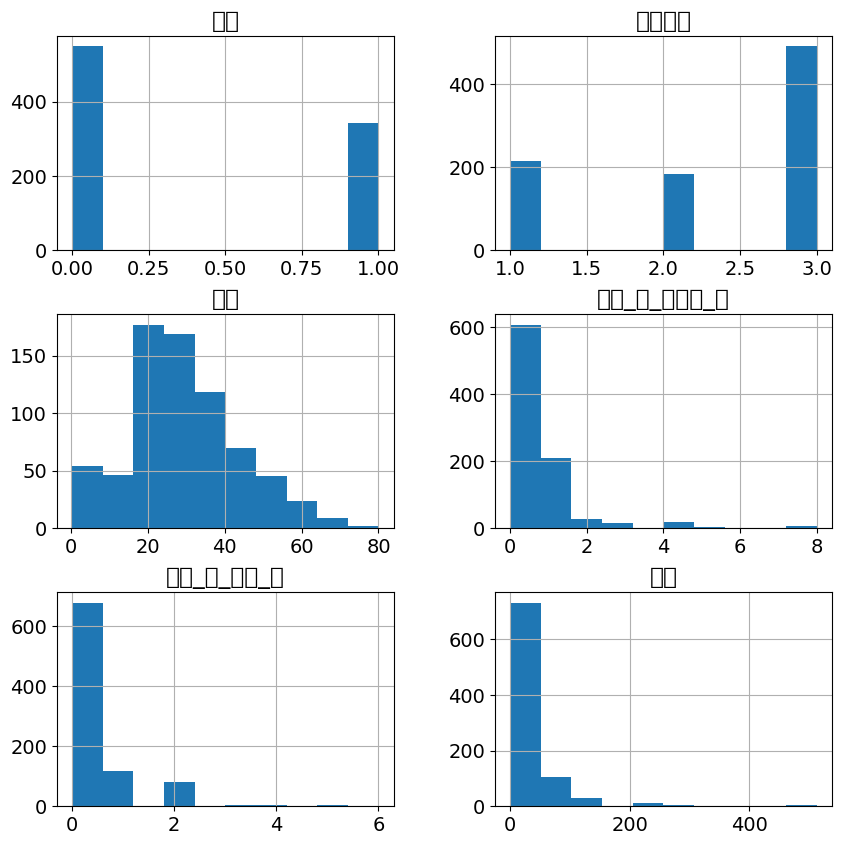

In [11]:
# 분석 대상 필드의 그래프 출력 (숫자 필드)

# 숫자 필드의 필드명 정의
columns_n = ['생존', '선실등급', '연령', '형제_및_배우자_수', '부모_및_자녀_수', '요금']


# 그래프 작도 영역 조정
plt.rcParams['figure.figsize'] = (10, 10)

# 데이터프레임의 숫자 필드에 대해 히스토그램을 출력
df_titanic[columns_n].hist()
plt.show()

#### 숫자 값이 아닌 필드에 대한 그래프 그리기

In [ ]:
# 분석 대상 필드의 그래프 출력 (숫자 값이 아닌 필드)

# 그래프를 그릴 필드의 필드명 정의
columns_c = ['성별', '승선항', '선실등급명', '성인_남성_여부']

# 그래프 작도 영역 조정
plt.rcParams['figure.figsize'] = (8, 8)

# 반복문을 돌며 히스토그램을 그린다
for i, name in enumerate(columns_c):
    ax = plt.subplot(2, 2, i+1)
    df_titanic[name].value_counts().plot(kind='bar', title=name, ax=ax)
    
# 레이아웃 조정  
plt.tight_layout() 
plt.show()

### 4.1.2 시각적인 분석 및 데이터 확인 방법

#### 아이리스 데이터 집합

#### 아이리스 데이터 집합의 필드 목록

**꽃받침 길이** (sepal_length)  
**꽃받침 폭** (sepal_width)  
**꽃잎 길이** (petal_length)  
**꽃잎 폭** (petal_width)  
**종** (species): versicolor/setosa/virginica  

In [ ]:
# 추가 라이브러리 임포트
import seaborn as sns

# 데이터 읽어 들이기
df_iris = sns.load_dataset("iris")

# 우리말 필드명 정의
columns_i = ['꽃받침_길이', '꽃받침_폭', '꽃잎_길이', '꽃잎_폭', '종']
df_iris.columns = columns_i

# 데이터 내용 확인
display(df_iris.head())

#### 산포도 그리기

In [ ]:
# matplotlib을 이용해 산포도 그리기

# 그래프 작도 영역을 조정
plt.figure(figsize=(6,6))

# 산포도 그리기
plt.scatter(df_iris['꽃받침_폭'], df_iris['꽃잎_길이'])

# 레이블 표시
# sepal 꽃받침 petal 꽃잎
plt.xlabel('꽃받침_폭')
plt.ylabel('꽃잎_길이')
plt.show()

In [ ]:
# seaborn을 이용한 산포도 그리기 (1)

plt.figure(figsize=(6,6))
sns.scatterplot(x='꽃받침_폭', y='꽃잎_길이', hue='종', s=70,
    data=df_iris)
plt.show()

In [ ]:
# 모든 필드의 조합으로 산포도 그리기
sns.pairplot(df_iris, hue="종")

plt.show()

In [ ]:
# seaborn을 이용한 산포도 그리기 (2)

sns.jointplot('꽃받침_폭', '꽃잎_길이', data=df_iris)
plt.show()

In [ ]:
# matplotlib을 이용한 상자 수염 그림 그리기

# 그래프 작도 영역 조정
plt.figure(figsize=(6,6))

# 상자 수염 그림 그리기
df_iris.boxplot(patch_artist=True)
plt.show()

In [ ]:
# melt 함수를 이용한 데이터 전처리
w = pd.melt(df_iris, id_vars=['종'])

# 전처리 결과 확인
display(w.head())

In [ ]:
# seaborn을 이용한 상자 수염 그림 그리기

# 인자 hue를 추가해 곷의 종마다 그림을 따로 그리게 한다
plt.figure(figsize=(8,8))
sns.boxplot(x="variable", y="value", data=w, hue='종')
plt.show()